# Øving 2: FFT

In [ ]:
# Imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

### Oppgave 1: sinussignal og sampling

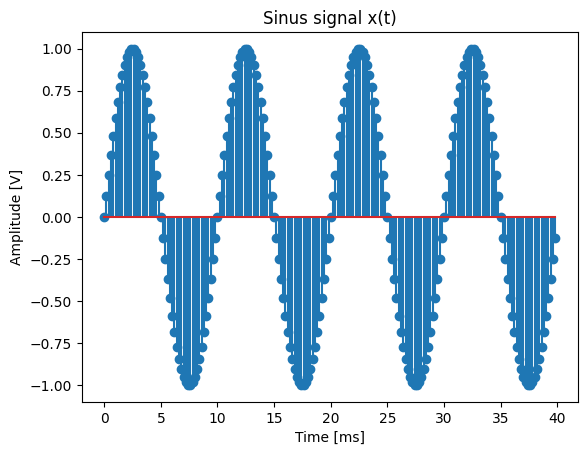

Sampling frequency = 5000.0 [Hz]
Nyquist limits = 2500.0 [Hz]


In [18]:
amplitude = 1               # [V]
frequency = 100             # [Hz]
sampling_time = 0.2e-3      # [s]
n_points = 900              # number of points along time-axis
time_axis = np.arange(n_points) * sampling_time
time_lin = np.linspace(0, 900, 1000) * sampling_time

x = amplitude * np.sin(2 * np.pi * frequency * time_axis)

plt.stem(time_axis[:200] * 1000, x[:200])
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [V]')
plt.title('Sinus signal x(t)')
plt.show()

sampling_frequency = 1 / sampling_time
print(f"Sampling frequency = {sampling_frequency} [Hz]")
nyquist_limit = sampling_frequency / 2
print(f"Nyquist limits = {nyquist_limit} [Hz]")


### Problem 2: obtaining freq. spectrum with FFT

In [43]:
# (a)

NFFT = 1024
X = sp.fft.fft(x, NFFT)
delta_frequency = sampling_frequency / NFFT
frequency_axis = np.arange(NFFT) * delta_frequency
print(f"Frequency steps: {delta_frequency}")


Frequency steps: 4.8828125


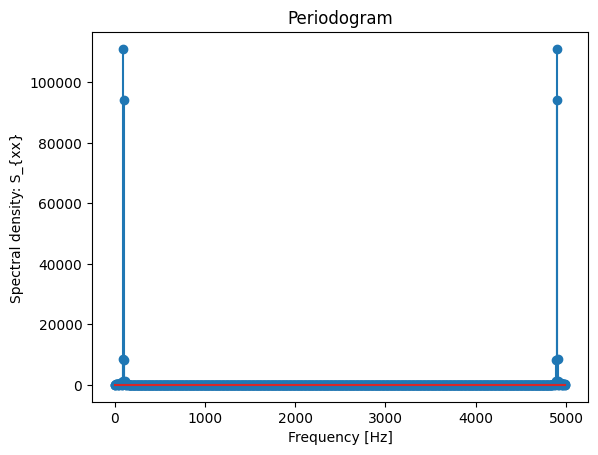

Mirror frequency: 4900.0 Hz


In [44]:
# (b)

spectral_density = np.abs(X) ** 2

plt.stem(frequency_axis, spectral_density)
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Spectral density: S_{xx}')
plt.title('Periodogram')
plt.show()

mirror_frequency = sampling_frequency - frequency
print(f"Mirror frequency: {mirror_frequency} Hz")

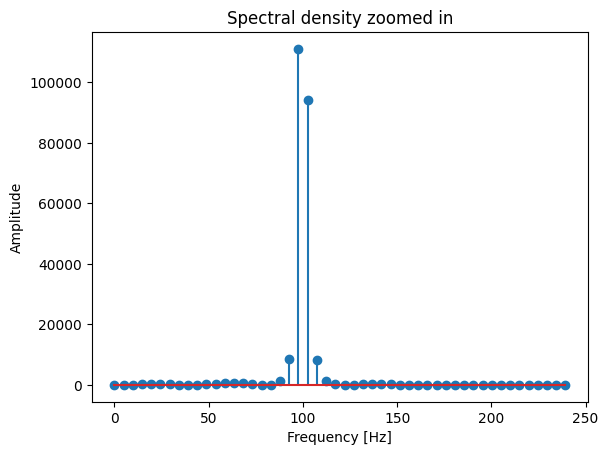

Max value of spectrum is at f = 100 Hz as expected


In [47]:
# (c)

plt.stem(frequency_axis[:50], spectral_density[:50])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('Spectral density zoomed in')
plt.show()

print('Max value of spectrum is at f = 100 Hz' + 
      ' as expected')


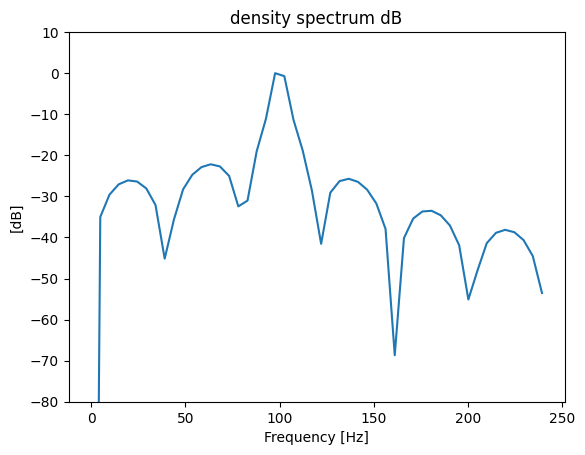

In [63]:
# (d)

X_decibel = 20*np.log10(np.abs(X))
normalized_spectral_density_decibel = X_decibel - np.max(X_decibel)

plt.plot(frequency_axis[:50], normalized_spectral_density_decibel[:50])
plt.xlabel('Frequency [Hz]')
plt.ylabel('[dB]')
plt.title('density spectrum dB')
plt.ylim(-80, 10)
plt.show()


### Oppgave 3: zero-padding

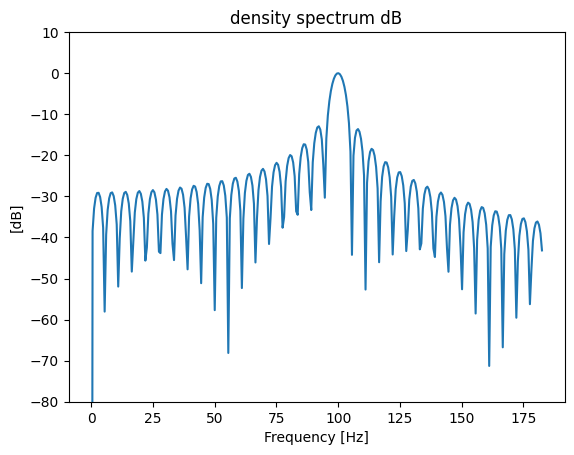

In [95]:
# (a)

NFFT_4096 = 2*4096
X_4096 = sp.fft.fft(x, NFFT_4096)
delta_frequency_4096 = sampling_frequency / NFFT_4096
frequency_axis_4096 = np.arange(NFFT_4096) * delta_frequency_4096

# plt.figure()
# plt.plot(frequency_axis_4096, X_4096)
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('X(f)')
# plt.title('FFT with N=2*4096')
# plt.show()

# plt.figure()
# plt.plot(frequency_axis_4096[:300], X_4096[:300])
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('X(f)')
# plt.title('FFT with N=2*4096')
# plt.show()

X_decibel_4096 = 20*np.log10(np.abs(X_4096))
normalized_spectral_density_decibel_4096 = X_decibel_4096 - np.max(X_decibel_4096)

plt.plot(frequency_axis_4096[:300], normalized_spectral_density_decibel_4096[:300])
plt.xlabel('Frequency [Hz]')
plt.ylabel('[dB]')
plt.title('density spectrum dB')
plt.ylim(-80, 10)
plt.show()

# (b) Zero-padding makes spectrum more smoot and easier to read. 


### Oppgave 4: vindusfunksjon

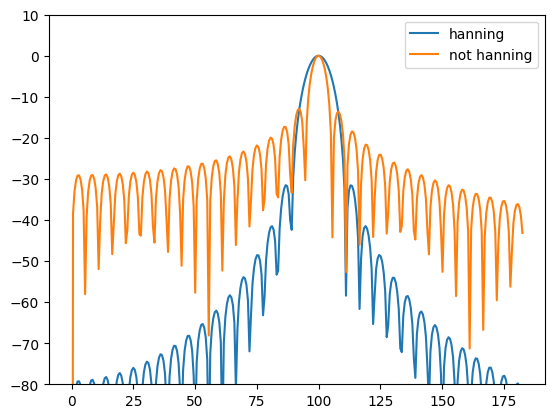

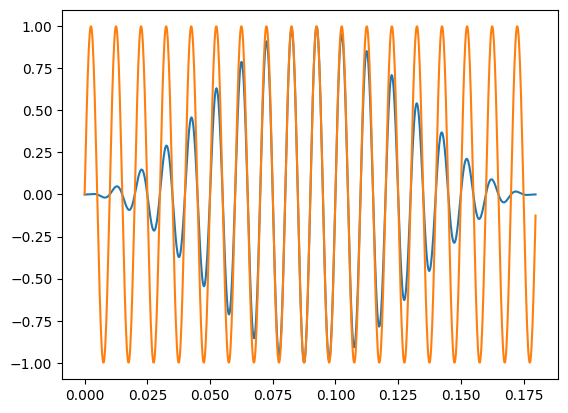

In [121]:
hanning_window = np.hanning(n_points)
x_hanning = x * hanning_window
X_hanning = sp.fft.fft(x_hanning, NFFT_4096)
X_hanning_decibel = 20*np.log10(np.abs(X_hanning))
X_hanning_decibel = X_hanning_decibel - np.max(X_hanning_decibel)

plt.figure()
plt.plot(frequency_axis_4096[:300], X_hanning_decibel[:300], label='hanning')
plt.plot(frequency_axis_4096[:300], normalized_spectral_density_decibel_4096[:300], label='not hanning')
plt.legend()
plt.ylim(-80, 10)

plt.show()

plt.figure()
plt.plot(time_axis, x_hanning)
plt.plot(time_axis, x)
plt.show()


### Oppgave 5: komplekst harmonisk signal

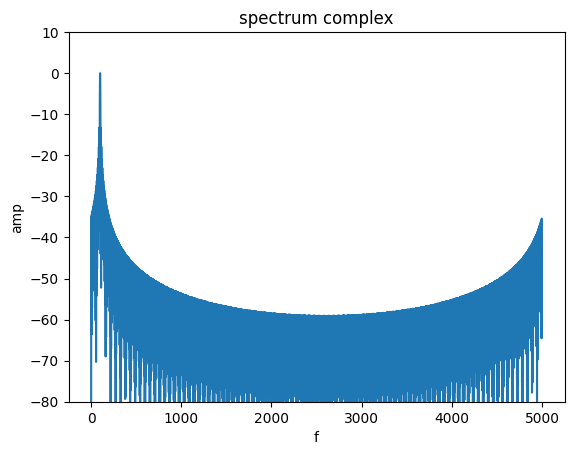

Sampling frequency = 5000.0 [Hz]
Nyquist limits = 2500.0 [Hz]


In [117]:
# (a)

x_complex = amplitude * np.exp(1j*2*np.pi*frequency*time_axis)
X_complex = sp.fft.fft(x_complex, NFFT_4096)
X_complex_decibel = 20*np.log10(np.abs(X_complex))
X_complex_decibel = X_complex_decibel - np.max(X_complex_decibel)

plt.plot(frequency_axis_4096, X_complex_decibel)
plt.xlabel('f')
plt.ylabel('amp')
plt.title('spectrum complex')
plt.ylim(-80, 10)
plt.show()

sampling_frequency = 1 / sampling_time
print(f"Sampling frequency = {sampling_frequency} [Hz]")
nyquist_limit = sampling_frequency / 2
print(f"Nyquist limits = {nyquist_limit} [Hz]")


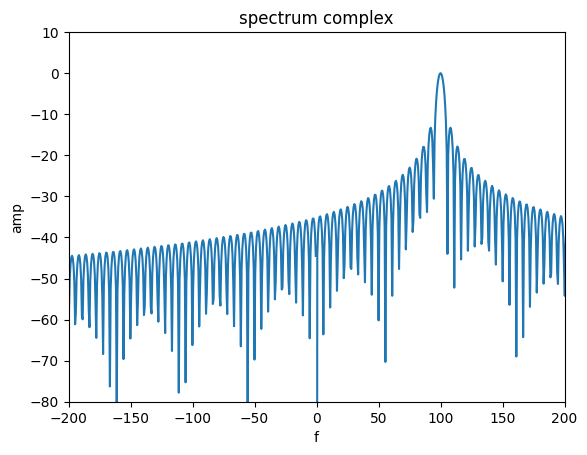

In [ ]:
# (b)

f_shift = np.fft.fftshift(frequency_axis_4096-sampling_frequency/2)

plt.plot(f_shift, X_complex_decibel)
plt.xlabel('f')
plt.ylabel('amp')
plt.title('spectrum complex')
plt.ylim(-80, 10)
plt.xlim(-200, 200)
plt.show()

# (c) når man endrer fortegnet får man en positiv maks frekvens på 100Hz
